In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I'm analyzing the average rating of movies and their sequals to see if any drops occur as time goes on. So far I have the following movies:

* Star Wars - star_Wars_Final
* Transformers - transformer_Final
* Toy Story - toy_Story_Final
* Harry Potter - harryPotter_final
* The Lord of the Rings - lotr_final
* Shrek - shrek_Series
* Star Trek - star_trek_series


In [99]:
movies = pd.read_csv("/Users/stephenkullman/Desktop/Python/Week-6-Mini-Project/movielens/ml-25m/movies.csv")
ratings = pd.read_csv("/Users/stephenkullman/Desktop/Python/Week-6-Mini-Project/movielens/ml-25m/ratings.csv")

In [100]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [101]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [102]:
#How many unique movie ID's?
print(len(movies["movieId"].unique()))

62423


In [103]:
#How many unqiue user ID's?
print(len(ratings["userId"].unique()))

162541


In [104]:
# Let's merge the two DataFrames to look at average rating based on movie ID
stage = pd.merge(movies,ratings, on = "movieId")

In [105]:
stage.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [106]:
#create a column for average rating
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()

In [107]:
#modify the stage by merging it and average rating created in the previous cell
stage = pd.merge(stage,average_rating,on = "movieId")

In [108]:
#rename column to average rating
stage.rename(columns={'rating_y':'avg_rating'}, inplace=True)

In [109]:
stage

,movieId,title,genres,userId,rating_x,timestamp,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820,3.893708
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215,3.893708
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252,3.893708
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949,3.893708
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517,3.893708
...,...,...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5,1574280748,1.500000
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,1574280985,3.000000
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,1574284913,4.500000
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826,3.000000


In [110]:
#Here we get rid of columns unrelated to my analysis
del stage["userId"],stage["rating_x"],stage["timestamp"]

In [111]:
stage

,movieId,title,genres,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
...,...,...,...,...
25000090,209157,We (2018),Drama,1.500000
25000091,209159,Window of the Soul (2001),Documentary,3.000000
25000092,209163,Bad Poems (2018),Comedy|Drama,4.500000
25000093,209169,A Girl Thing (2001),(no genres listed),3.000000


In [112]:
#Here I remove the duplicates of movidID because of the different UserID's rating the movie. 
#But I made a mistake in not assigning it to a new stage. Which is why I had repeat code below. Bad
stage.drop_duplicates(subset = "movieId")

,movieId,title,genres,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
57309,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
81537,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
93341,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
95864,5,Father of the Bride Part II (1995),Comedy,3.058434
...,...,...,...,...
25000090,209157,We (2018),Drama,1.500000
25000091,209159,Window of the Soul (2001),Documentary,3.000000
25000092,209163,Bad Poems (2018),Comedy|Drama,4.500000
25000093,209169,A Girl Thing (2001),(no genres listed),3.000000


# Now we have our base dataFrame to work with. Next, we'll filter the data for Toy Story

In [113]:
#returns a boolean if the title contains the string
toy_story = stage["title"].str.contains("Toy Story")

In [114]:
#We just want the true values
toy_Story_Series = stage[toy_story]

In [115]:
toy_Story_Final = toy_Story_Series.drop_duplicates(subset = 'movieId')

In [116]:
#reset the row index to make it easier to work with
toy_Story_Final = toy_Story_Final.reset_index(drop=True)

In [117]:
#This line drops fan fiction or non-main movies from the analysis
toy_Story_Final = toy_Story_Final.drop([3,4,5,6,7],axis = 0)

<AxesSubplot:title={'center':'Toy Story Series'}, xlabel='title'>

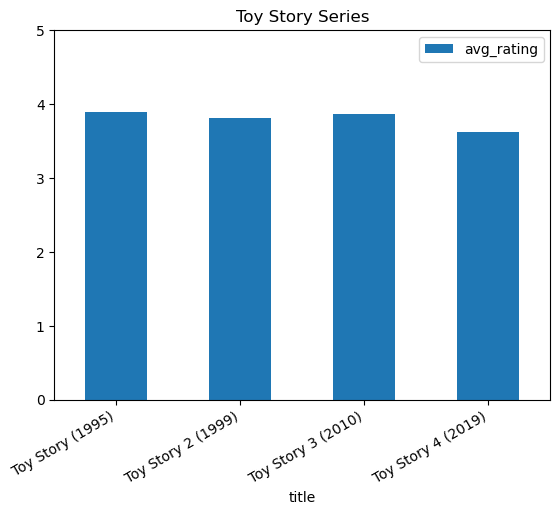

In [118]:
ts_graph = toy_Story_Final.plot.bar(x = 'title',y = 'avg_rating')
ts_graph.set_ylim(0,5)
ts_graph.set_title('Toy Story Series')
ts_graph.set_xticklabels(ts_graph.get_xticklabels(), rotation=30, ha='right')
ts_graph

# Transformer Series

In [119]:
transformers = stage["title"].str.contains("Transformers")
transformer_Series = stage[transformers]

In [120]:
transformer_Series

,movieId,title,genres,avg_rating
14710330,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,3.247045
14710331,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,3.247045
14710332,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,3.247045
14710333,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,3.247045
14710334,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,3.247045
...,...,...,...,...
24782023,174585,Transformers: The Last Knight (2017),Action|Adventure|Sci-Fi|Thriller,2.402720
24782024,174585,Transformers: The Last Knight (2017),Action|Adventure|Sci-Fi|Thriller,2.402720
24782025,174585,Transformers: The Last Knight (2017),Action|Adventure|Sci-Fi|Thriller,2.402720
24782026,174585,Transformers: The Last Knight (2017),Action|Adventure|Sci-Fi|Thriller,2.402720


In [121]:
transformer_Final = transformer_Series.drop_duplicates(subset = 'movieId')
display(transformer_Final)

,movieId,title,genres,avg_rating
14710330,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,3.247045
20756333,53996,Transformers (2007),Action|Sci-Fi|Thriller|IMAX,3.090717
21822405,69526,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX,2.707010
22712900,87520,Transformers: Dark of the Moon (2011),Action|Adventure|Sci-Fi|War|IMAX,2.721619
23809902,112370,Transformers: Age of Extinction (2014),Action|Adventure|Sci-Fi,2.558243
24469492,147597,Transformers Prime Beast Hunters: Predacons Ri...,Action|Animation|Sci-Fi,2.700000
24781550,174585,Transformers: The Last Knight (2017),Action|Adventure|Sci-Fi|Thriller,2.402720


In [122]:
transformer_Final = transformer_Final.drop(24469492)

In [123]:
transformer_Final = transformer_Final.reset_index(drop=True)
display(transformer_Final)

,movieId,title,genres,avg_rating
0,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,3.247045
1,53996,Transformers (2007),Action|Sci-Fi|Thriller|IMAX,3.090717
2,69526,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX,2.707010
3,87520,Transformers: Dark of the Moon (2011),Action|Adventure|Sci-Fi|War|IMAX,2.721619
4,112370,Transformers: Age of Extinction (2014),Action|Adventure|Sci-Fi,2.558243
5,174585,Transformers: The Last Knight (2017),Action|Adventure|Sci-Fi|Thriller,2.402720


<AxesSubplot:title={'center':'Transformer Series'}, xlabel='title'>

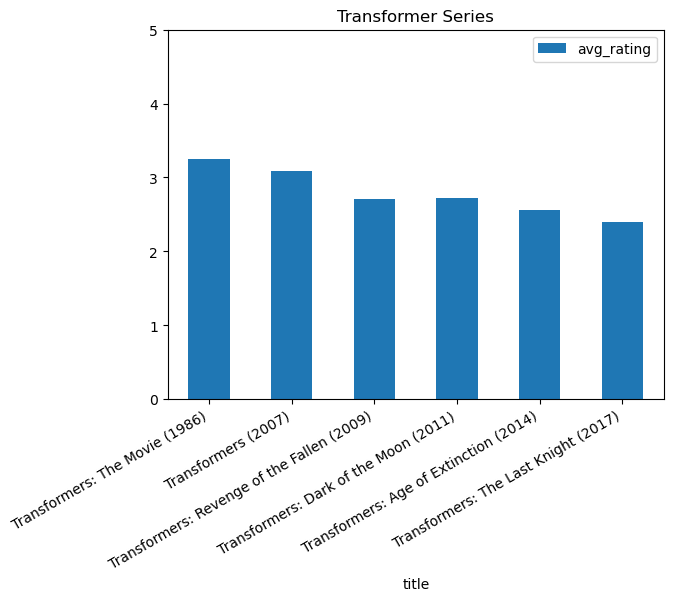

In [124]:
transformer_graph = transformer_Final.plot.bar(x = 'title',y = 'avg_rating')
transformer_graph.set_ylim(0,5)
transformer_graph.set_title('Transformer Series')
transformer_graph.set_xticklabels(transformer_graph.get_xticklabels(), rotation=30, ha='right')
transformer_graph

# Star Wars Series

In [125]:
star_Wars = stage["title"].str.contains("Star Wars")
star_War_Series = stage[star_Wars]

In [126]:
star_War_Series

,movieId,title,genres,avg_rating
1679130,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189
1679131,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189
1679132,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189
1679133,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189
1679134,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189
...,...,...,...,...
24906193,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,3.389589
24906194,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,3.389589
24962081,195217,Star Wars: Dresca,Sci-Fi,2.833333
24962082,195217,Star Wars: Dresca,Sci-Fi,2.833333


In [127]:
#We just want the first 9 episodes, although the final movie released in 2019 after the data was taken
star_Wars_Final = star_War_Series.drop_duplicates(subset = 'movieId')
star_Wars_Final = star_Wars_Final.reset_index(drop=True)
star_Wars_Final = star_Wars_Final.drop([6,7,8,10,11,12,13,15,16,17,18,19,20], axis = 0)

In [128]:
star_Wars_Final = star_Wars_Final.reset_index(drop=True)
display(star_Wars_Final)

,movieId,title,genres,avg_rating
0,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189
1,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.144122
2,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,3.996513
3,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi,3.069856
4,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,3.053703
5,33493,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi,3.388895
6,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,3.739115
7,179819,Star Wars: The Last Jedi (2017),Action|Adventure|Fantasy|Sci-Fi,3.446024


<AxesSubplot:title={'center':'Star Wars Series'}, xlabel='title'>

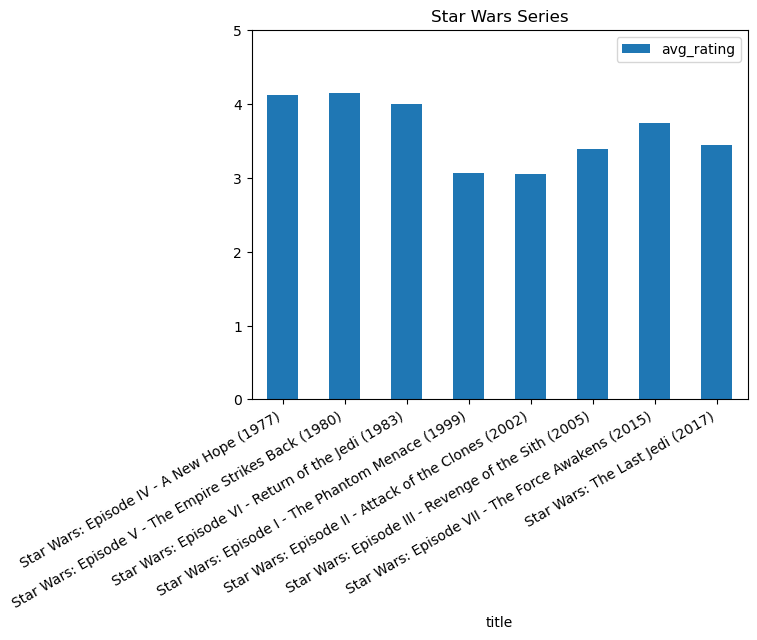

In [129]:
sw_graph = star_Wars_Final.plot.bar(x = 'title',y = 'avg_rating')
sw_graph.set_ylim(0,5)
sw_graph.set_title('Star Wars Series')
sw_graph.set_xticklabels(sw_graph.get_xticklabels(), rotation=30, ha='right')
sw_graph

# Harry Potter Series

In [130]:
harryPotter = stage["title"].str.contains("Harry Potter")
harryPotter_Series = stage[harryPotter]

In [131]:
harryPotter_Series

,movieId,title,genres,avg_rating
15885834,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,3.678158
15885835,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,3.678158
15885836,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,3.678158
15885837,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,3.678158
15885838,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,3.678158
...,...,...,...,...
24893241,186777,The Greater Good - Harry Potter Fan Film (2013),Action|Adventure|Fantasy,3.500000
24893242,186777,The Greater Good - Harry Potter Fan Film (2013),Action|Adventure|Fantasy,3.500000
24893243,186777,The Greater Good - Harry Potter Fan Film (2013),Action|Adventure|Fantasy,3.500000
24893244,186777,The Greater Good - Harry Potter Fan Film (2013),Action|Adventure|Fantasy,3.500000


In [132]:
harryPotter_final = harryPotter_Series.drop_duplicates(subset = 'movieId')
display(harryPotter_final)

,movieId,title,genres,avg_rating
15885834,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,3.678158
16902330,5816,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,3.641784
18618881,8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,3.811112
19852543,40815,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX,3.767880
20766467,54001,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX,3.768890
21851053,69844,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX,3.834885
22464410,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX,3.865438
22725904,88125,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX,3.906986
24893235,186777,The Greater Good - Harry Potter Fan Film (2013),Action|Adventure|Fantasy,3.500000


In [133]:
harryPotter_final = harryPotter_final.drop(24893235)
display(harryPotter_final)

,movieId,title,genres,avg_rating
15885834,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,3.678158
16902330,5816,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,3.641784
18618881,8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,3.811112
19852543,40815,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX,3.767880
20766467,54001,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX,3.768890
21851053,69844,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX,3.834885
22464410,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX,3.865438
22725904,88125,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX,3.906986


In [134]:
harryPotter_final = harryPotter_final.reset_index(drop = True)
display(harryPotter_final)

,movieId,title,genres,avg_rating
0,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,3.678158
1,5816,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,3.641784
2,8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,3.811112
3,40815,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX,3.767880
4,54001,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX,3.768890
5,69844,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX,3.834885
6,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX,3.865438
7,88125,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX,3.906986


<AxesSubplot:title={'center':'Harry Potter Series'}, xlabel='title'>

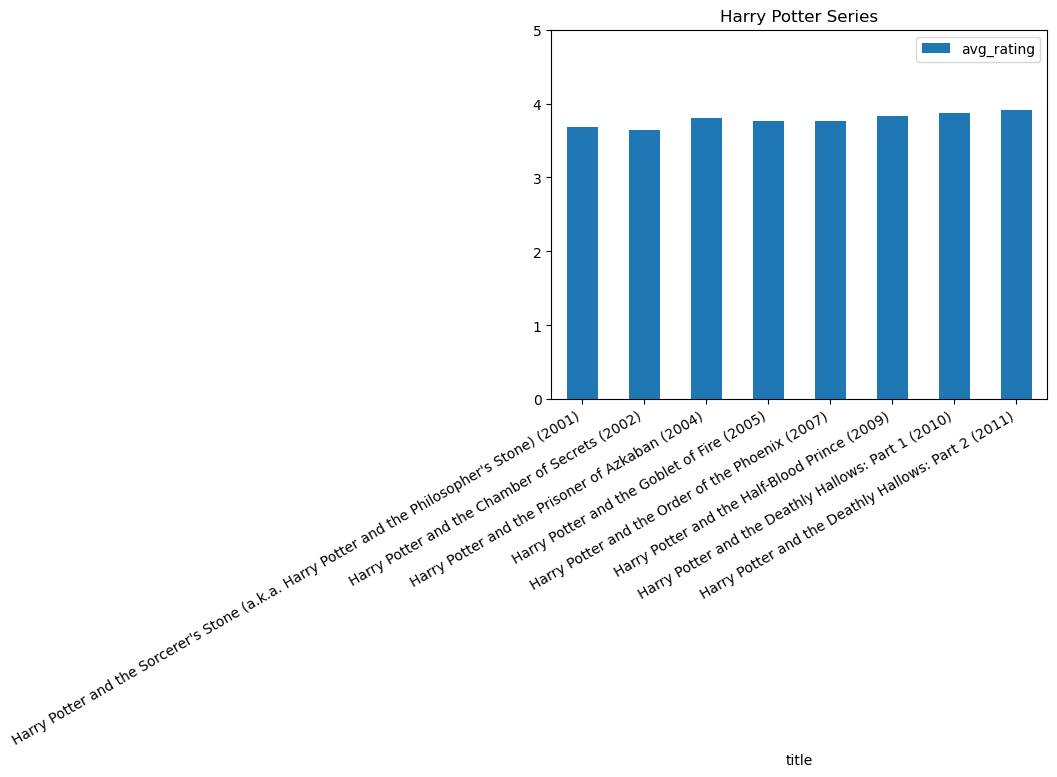

In [135]:
hp_graph = harryPotter_final.plot.bar(x = 'title',y = 'avg_rating')
hp_graph.set_ylim(0,5)
hp_graph.set_title('Harry Potter Series')
hp_graph.set_xticklabels(hp_graph.get_xticklabels(), rotation=30, ha='right')
hp_graph

# Lord of the Rings series

In [136]:
lotr = stage["title"].str.contains("Lord of the Rings")
lotr_series = stage[lotr]

In [137]:
lotr_series

,movieId,title,genres,avg_rating
10142022,2116,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy,3.207337
10142023,2116,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy,3.207337
10142024,2116,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy,3.207337
10142025,2116,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy,3.207337
10142026,2116,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy,3.207337
...,...,...,...,...
18177133,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.090340
18177134,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.090340
18177135,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.090340
18177136,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.090340


In [138]:
print(len(lotr_series["movieId"].unique()))

4


In [139]:
lotr_final = lotr_series.drop_duplicates(subset = 'movieId')

In [140]:
lotr_final = lotr_final.drop(10142022)
display(lotr_final)

,movieId,title,genres,avg_rating
16063997,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.091189
17004770,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,4.068051
18126341,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.090340


In [141]:
lotr_final = lotr_final.reset_index(drop = True)
display(lotr_final)

,movieId,title,genres,avg_rating
0,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.091189
1,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,4.068051
2,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.090340


<AxesSubplot:title={'center':'Lord of the Rings Series'}, xlabel='title'>

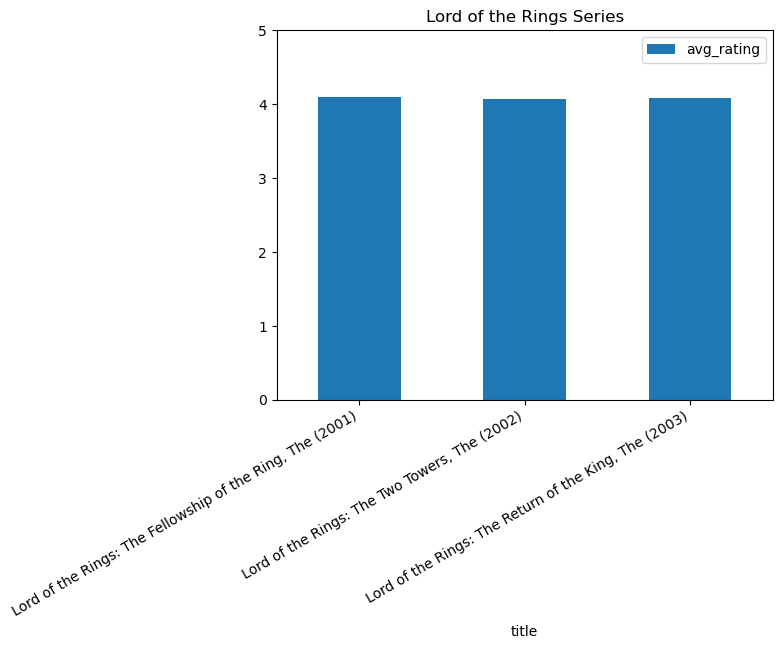

In [142]:
lotr_graph = lotr_final.plot.bar(x = 'title',y = 'avg_rating')
lotr_graph.set_ylim(0,5)
lotr_graph.set_title('Lord of the Rings Series')
lotr_graph.set_xticklabels(lotr_graph.get_xticklabels(), rotation=30, ha='right')
lotr_graph

# Pirates of the Caribbean

In [143]:
potc = stage["title"].str.contains("Pirates of the Caribbean")

In [144]:
potc_series = stage[potc]

In [145]:
display(potc_series)

,movieId,title,genres,avg_rating
17555976,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,3.789212
17555977,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,3.789212
17555978,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,3.789212
17555979,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,3.789212
17555980,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,3.789212
...,...,...,...,...
24108350,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),3.235033
24108351,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),3.235033
24108352,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),3.235033
24108353,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),3.235033


In [146]:
potc_series = potc_series.drop_duplicates(subset='movieId')

In [147]:
display(potc_series)

,movieId,title,genres,avg_rating
17555976,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,3.789212
20143894,45722,Pirates of the Caribbean: Dead Man's Chest (2006),Action|Adventure|Fantasy,3.457057
20696637,53125,Pirates of the Caribbean: At World's End (2007),Action|Adventure|Comedy|Fantasy,3.390629
22663061,86880,Pirates of the Caribbean: On Stranger Tides (2...,Action|Adventure|Fantasy|IMAX,3.248382
24106668,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),3.235033


<AxesSubplot:title={'center':'Pirates of the Caribbean Series'}, xlabel='title'>

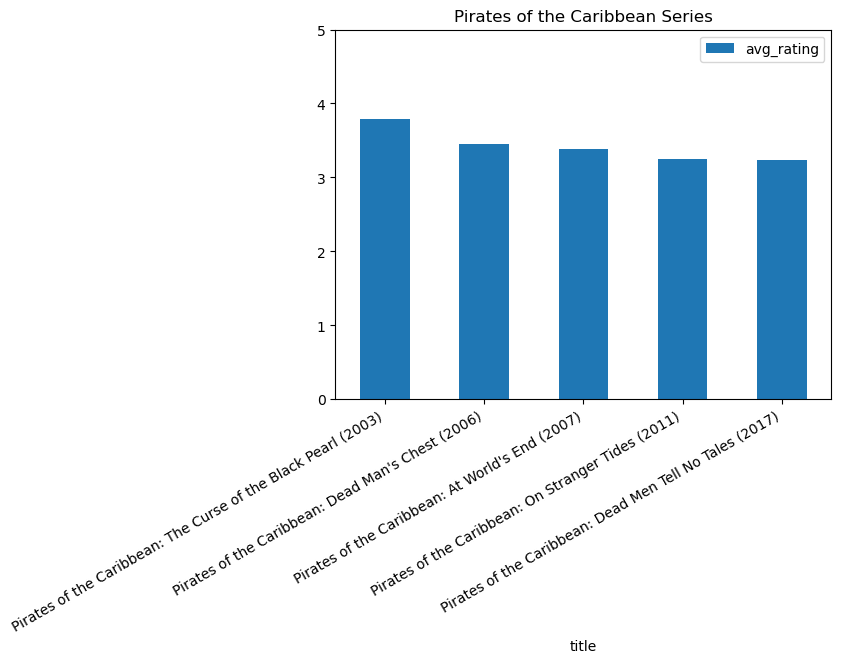

In [148]:
potc_graph = potc_series.plot.bar(x='title',y='avg_rating')
potc_graph.set_ylim(0,5)
potc_graph.set_title('Pirates of the Caribbean Series')
potc_graph.set_xticklabels(potc_graph.get_xticklabels(), rotation=30, ha='right')
potc_graph

# Shrek

In [149]:
shrek = stage["title"].str.contains("Shrek")
shrek_Series = stage[shrek]
shrek_Series = shrek_Series.drop_duplicates(subset = 'movieId')
display(shrek_Series)

,movieId,title,genres,avg_rating
15207872,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,3.754828
18583849,8360,Shrek 2 (2004),Adventure|Animation|Children|Comedy|Musical|Ro...,3.475468
20688996,53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,2.910454
21526576,64249,Shrek the Halls (2007),Adventure|Animation|Comedy|Fantasy,2.947896
22259577,78637,Shrek Forever After (a.k.a. Shrek: The Final C...,Adventure|Animation|Children|Comedy|Fantasy|IMAX,3.006565
22458110,81711,Scared Shrekless (2010),Adventure|Animation|Comedy,3.056250
24967062,196619,Shrek Retold (2018),Adventure|Animation|Comedy|Fantasy,2.666667


In [150]:
shrek_Series = shrek_Series.reset_index(drop=True)

In [151]:
shrek_Series = shrek_Series.drop([3,5,6], axis = 0)

In [152]:
display(shrek_Series)

,movieId,title,genres,avg_rating
0,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,3.754828
1,8360,Shrek 2 (2004),Adventure|Animation|Children|Comedy|Musical|Ro...,3.475468
2,53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,2.910454
4,78637,Shrek Forever After (a.k.a. Shrek: The Final C...,Adventure|Animation|Children|Comedy|Fantasy|IMAX,3.006565


<AxesSubplot:title={'center':'Shrek Series'}, xlabel='title'>

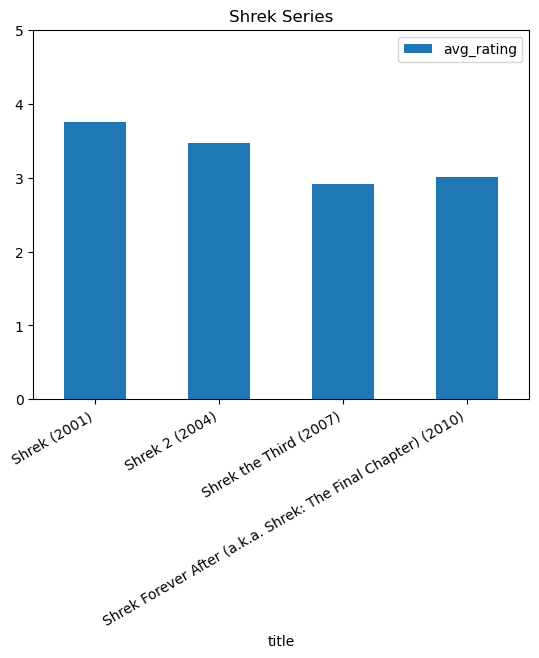

In [153]:
shrek_graph = shrek_Series.plot.bar(x = 'title',y = 'avg_rating')
shrek_graph.set_ylim(0,5)
shrek_graph.set_title('Shrek Series')
shrek_graph.set_xticklabels(shrek_graph.get_xticklabels(), rotation=30, ha='right')
shrek_graph

# Star Trek

In [154]:
star_trek = stage["title"].str.contains("Star Trek")

In [155]:
star_trek_series = stage[star_trek]

In [156]:
star_trek_series = star_trek_series.drop_duplicates(subset='movieId')

In [157]:
display(star_trek_series)

,movieId,title,genres,avg_rating
2237039,329,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi,3.322669
7702131,1356,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi|Thriller,3.654593
7777006,1371,Star Trek: The Motion Picture (1979),Adventure|Sci-Fi,3.092753
7786375,1372,Star Trek VI: The Undiscovered Country (1991),Action|Mystery|Sci-Fi,3.319210
7796677,1373,Star Trek V: The Final Frontier (1989),Action|Sci-Fi,2.850332
7803756,1374,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller,3.702097
7819543,1375,Star Trek III: The Search for Spock (1984),Action|Adventure|Sci-Fi,3.253089
7829901,1376,Star Trek IV: The Voyage Home (1986),Adventure|Comedy|Sci-Fi,3.501271
10883674,2393,Star Trek: Insurrection (1998),Action|Drama|Romance|Sci-Fi,3.201086
16993911,5944,Star Trek: Nemesis (2002),Action|Drama|Sci-Fi|Thriller,3.148834


In [158]:
star_trek_series["year"] = star_trek_series["title"].str.extract('(\d{4})')

In [159]:
star_trek_series = star_trek_series.sort_values(by="year")

In [160]:
star_trek_series = star_trek_series.reset_index(drop=True)

In [161]:
star_trek_series = star_trek_series.drop([10,13,15,16])

In [162]:
display(star_trek_series)

,movieId,title,genres,avg_rating,year
0,1371,Star Trek: The Motion Picture (1979),Adventure|Sci-Fi,3.092753,1979
1,1374,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller,3.702097,1982
2,1375,Star Trek III: The Search for Spock (1984),Action|Adventure|Sci-Fi,3.253089,1984
3,1376,Star Trek IV: The Voyage Home (1986),Adventure|Comedy|Sci-Fi,3.501271,1986
4,1373,Star Trek V: The Final Frontier (1989),Action|Sci-Fi,2.850332,1989
5,1372,Star Trek VI: The Undiscovered Country (1991),Action|Mystery|Sci-Fi,3.319210,1991
6,329,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi,3.322669,1994
7,1356,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi|Thriller,3.654593,1996
8,2393,Star Trek: Insurrection (1998),Action|Drama|Romance|Sci-Fi,3.201086,1998
9,5944,Star Trek: Nemesis (2002),Action|Drama|Sci-Fi|Thriller,3.148834,2002


<AxesSubplot:title={'center':'Star Trek Series'}, xlabel='title'>

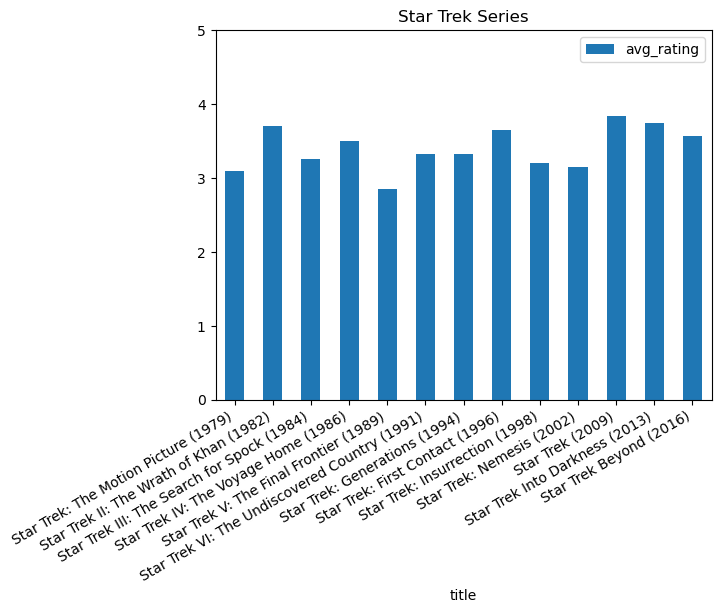

In [163]:
startrekgraph = star_trek_series.plot.bar(x = 'title',y = 'avg_rating')
startrekgraph.set_ylim(0,5)
startrekgraph.set_title('Star Trek Series')
startrekgraph.set_xticklabels(startrekgraph.get_xticklabels(), rotation=30, ha='right')
startrekgraph

# Lessons Learned
* Functions I should have created to not repeat myself
** A mask function which takes a string and runs the str.contain(input) code, deletes duplicates, and reindexes
** A function which takes a DataFrame and plots it formatted